In [3]:
import numpy as np
import networkx as nx
import igraph
import progressbar
from icecream import ic
import os
import time
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import shutil

ic.configureOutput(prefix = 'debug | -> ')
ic.disable()
ic.enable()

C:\Users\Jairo Enrique\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Jairo Enrique\.conda\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Entreno y evaluación de las redes con scale free networks

In [9]:
PATH_INSTANCES = './BRKGA/instances/scalefree/train/dimacs/'
NEW_PATH = "./BRKGA/instances/scalefree/train/txt/"

In [10]:
def Dimacs2Txt(ruta, nuevaruta):
    file1 = open(ruta, 'rb')
    Lines = file1.readlines()
    SizeAnt = len(Lines)
    newname = ".".join((PATH_INSTANCES+file).split("/")[-1].split(".")[:-1])+".txt"
    file2 = open(nuevaruta+newname, 'w')
    c = 0
    for line in Lines[1:]:
        v = line.strip().split()
        file2.write(f"{int(v[1])-1} {int(v[2])-1}")
        file2.write('\n')
        c += 1
    file1.close()
    file2.close()
    print(f"para {newname} se escribieron {c} lines y eran {SizeAnt}")
    return newname


In [11]:
Graphs = [graph for graph in os.listdir(PATH_INSTANCES)]
for file in progressbar.progressbar(Graphs):
    Dimacs2Txt(PATH_INSTANCES+file, NEW_PATH)

 10% (2 of 20) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:02

para graph1__2.25_1000_10.txt se escribieron 10000 lines y eran 10001
para graph1__2.25_1000_20.txt se escribieron 20000 lines y eran 20001


 25% (5 of 20) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:01

para graph1__2.25_1000_30.txt se escribieron 30000 lines y eran 30001
para graph1__2.25_1000_5.txt se escribieron 5000 lines y eran 5001
para graph1__2.5_1000_10.txt se escribieron 10000 lines y eran 10001


 30% (6 of 20) |#######                  | Elapsed Time: 0:00:00 ETA:   0:00:01

para graph1__2.5_1000_20.txt se escribieron 20000 lines y eran 20001
para graph1__2.5_1000_30.txt se escribieron 30000 lines y eran 30001


 45% (9 of 20) |###########              | Elapsed Time: 0:00:01 ETA:   0:00:01

para graph1__2.5_1000_5.txt se escribieron 5000 lines y eran 5001
para graph1__2.75_1000_10.txt se escribieron 10000 lines y eran 10001


 50% (10 of 20) |############            | Elapsed Time: 0:00:01 ETA:   0:00:01

para graph1__2.75_1000_20.txt se escribieron 20000 lines y eran 20001


 65% (13 of 20) |###############         | Elapsed Time: 0:00:01 ETA:   0:00:00

para graph1__2.75_1000_30.txt se escribieron 30000 lines y eran 30001
para graph1__2.75_1000_5.txt se escribieron 5000 lines y eran 5001
para graph1__2_1000_10.txt se escribieron 10000 lines y eran 10001


 70% (14 of 20) |################        | Elapsed Time: 0:00:01 ETA:   0:00:00

para graph1__2_1000_20.txt se escribieron 20000 lines y eran 20001


 85% (17 of 20) |####################    | Elapsed Time: 0:00:02 ETA:   0:00:00

para graph1__2_1000_30.txt se escribieron 30000 lines y eran 30001
para graph1__2_1000_5.txt se escribieron 5000 lines y eran 5001
para graph1__3_1000_10.txt se escribieron 10000 lines y eran 10001


 90% (18 of 20) |#####################   | Elapsed Time: 0:00:02 ETA:   0:00:00

para graph1__3_1000_20.txt se escribieron 20000 lines y eran 20001


100% (20 of 20) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


para graph1__3_1000_30.txt se escribieron 30000 lines y eran 30001
para graph1__3_1000_5.txt se escribieron 5000 lines y eran 5001


In [26]:
G = igraph.Graph.Read_Edgelist(NEW_PATH+'graph1__2.5_1000_5.txt', directed = False)
G = G.to_networkx()

In [29]:
list(nx.isolates(G))

[163]

In [6]:
PATH_INSTANCES = './BRKGA/instances/erdos/dimacs/'
[graph for graph in os.listdir(PATH_INSTANCES)]

['ER_10000_10_0.dimacs',
 'ER_10000_10_1.dimacs',
 'ER_10000_15_0.dimacs',
 'ER_10000_15_1.dimacs',
 'ER_10000_20_0.dimacs',
 'ER_10000_20_1.dimacs',
 'ER_1000_10_0.dimacs',
 'ER_1000_10_1.dimacs',
 'ER_1000_10_2.dimacs',
 'ER_1000_10_3.dimacs',
 'ER_1000_15_0.dimacs',
 'ER_1000_15_1.dimacs',
 'ER_1000_15_2.dimacs',
 'ER_1000_15_3.dimacs',
 'ER_1000_20_0.dimacs',
 'ER_1000_20_1.dimacs',
 'ER_1000_20_2.dimacs',
 'ER_1000_20_3.dimacs',
 'ER_20000_10_0.dimacs',
 'ER_20000_10_1.dimacs',
 'ER_20000_15_0.dimacs',
 'ER_20000_15_1.dimacs',
 'ER_20000_20_0.dimacs',
 'ER_20000_20_1.dimacs',
 'ER_2000_10_0.dimacs',
 'ER_2000_10_1.dimacs',
 'ER_2000_10_2.dimacs',
 'ER_2000_10_3.dimacs',
 'ER_2000_15_0.dimacs',
 'ER_2000_15_1.dimacs',
 'ER_2000_15_2.dimacs',
 'ER_2000_15_3.dimacs',
 'ER_2000_20_0.dimacs',
 'ER_2000_20_1.dimacs',
 'ER_2000_20_2.dimacs',
 'ER_2000_20_3.dimacs',
 'ER_30000_10_0.dimacs',
 'ER_30000_15_0.dimacs',
 'ER_30000_20_0.dimacs',
 'ER_50000_10_0.dimacs',
 'ER_50000_15_0.dimacs',

## Análizando características topológicas de las redes en las soluciones óptimas

In [50]:
import igraph
import networkx as nx
import matplotlib.pyplot as plt

PATH = './BRKGA/instances/scalefree/train/txt/graph1__2.5_1000_30.txt'
#PATH = './BRKGA/instances/Erdos/train/txt/ER_5000_10_3.txt'
G = igraph.Graph.Read_Edgelist(PATH, directed = False)
G = G.to_networkx()

PATH_OP = './BRKGA/instances/scalefree/train/optimal/graph1__2.5_1000_30.txt'
#PATH_OP = './BRKGA/instances/Erdos/train/optimal/ER_5000_10_3.dimacs'
solucion = []
with open(PATH_OP) as f:
    for line in f.readlines():
        solucion.append(int(line.replace("\n", "")))


In [51]:
print(f"Tamaño de la solución: {len(solucion)}")

Tamaño de la solución: 168


In [52]:
BC = np.array(list(nx.betweenness_centrality(G, k = 500).values()))

In [53]:
CC = np.array(list(nx.closeness_centrality(G).values()))

In [54]:
DG = np.array(list(nx.degree(G))).T[1]

PR = np.array(list(nx.pagerank(G).values()))

EC = np.array(list(nx.eigenvector_centrality(G).values()))

features = [BC, PR, DG, CC, EC]
#features = np.array(features).T
names = ["BC", "PageRank", "degree", "closeness_centrality", "EC"]

In [55]:
k = len(solucion)
for topo_feature, name in zip(features, names):
    
    TOP = np.argpartition(topo_feature, -k)[-k:]

    print( f" El {len(np.intersect1d(solucion, TOP)) / k :.2f} de los elementos para {name} se encuentran en la solución")

 El 0.93 de los elementos para BC se encuentran en la solución
 El 0.96 de los elementos para PageRank se encuentran en la solución
 El 0.96 de los elementos para degree se encuentran en la solución
 El 0.95 de los elementos para closeness_centrality se encuentran en la solución
 El 0.93 de los elementos para EC se encuentran en la solución


In [46]:
Mask = np.zeros(G.number_of_nodes())
Mask[solucion] = 1

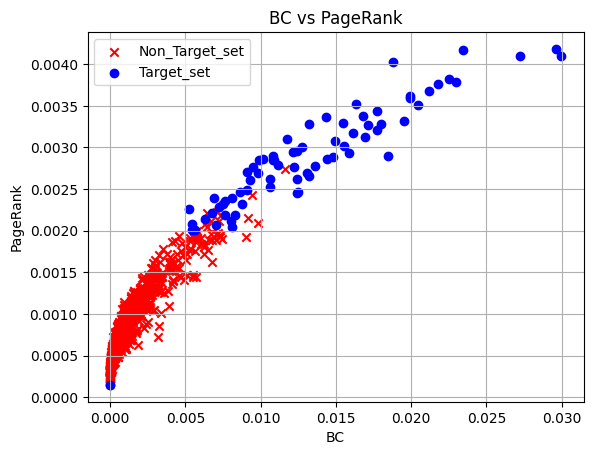

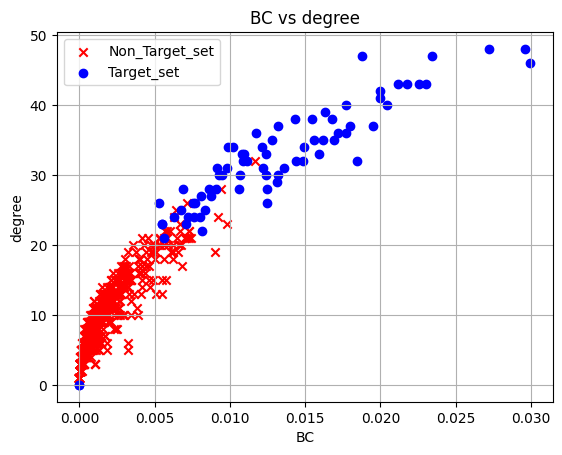

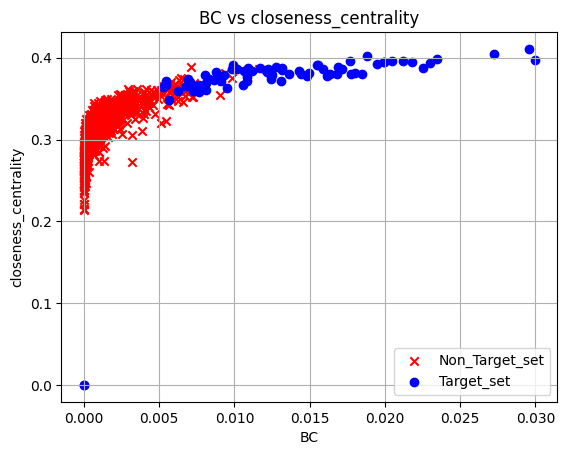

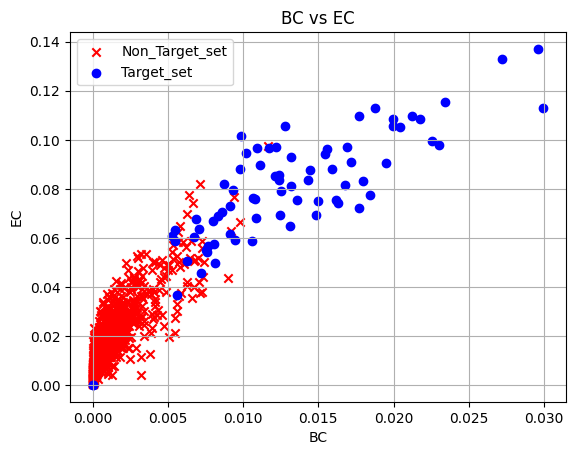

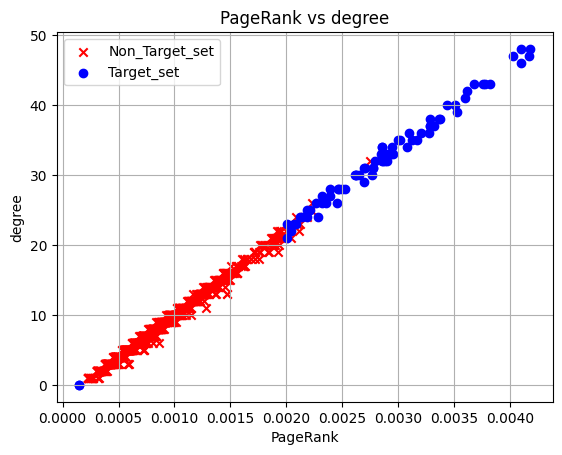

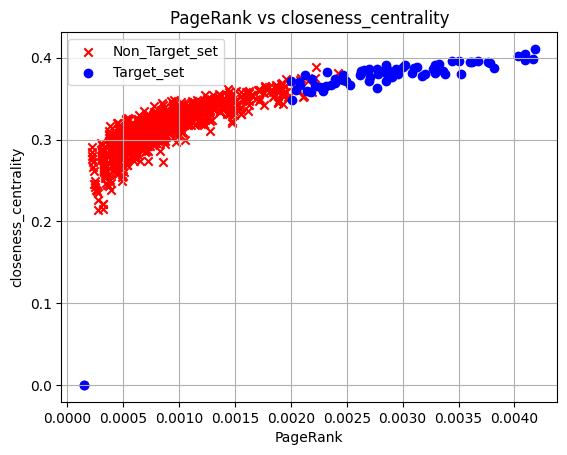

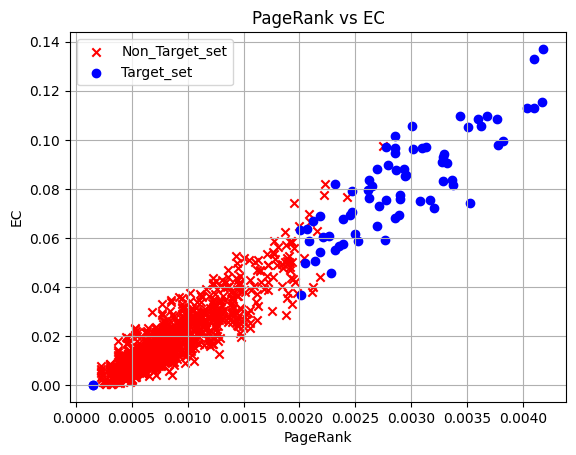

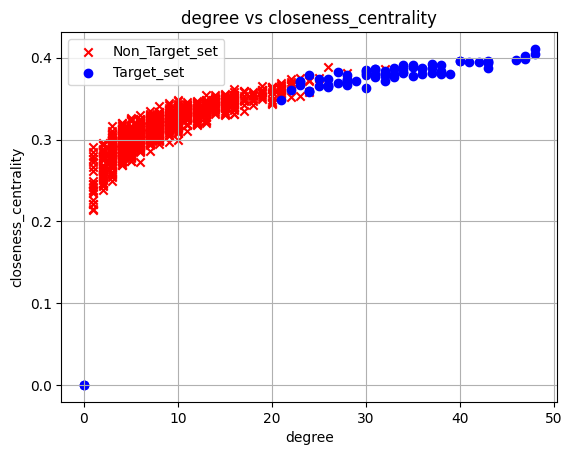

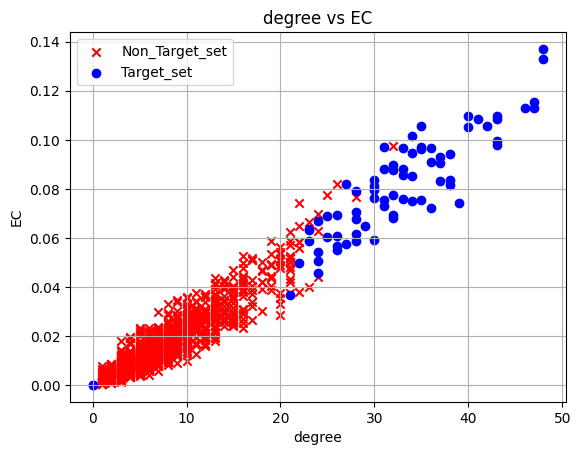

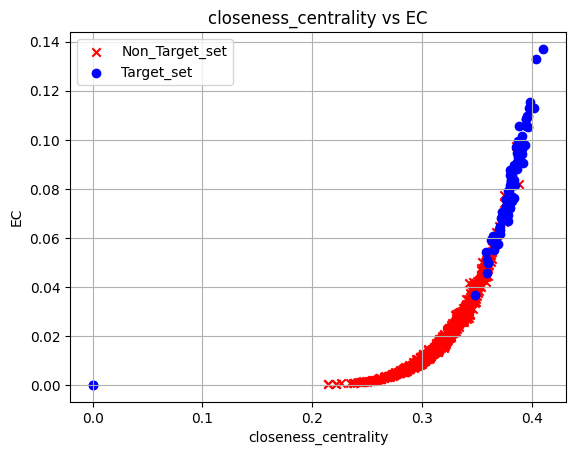

In [49]:
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        if i == j:
            continue
        plt.scatter( features[i][Mask == 0], features[j][Mask == 0] , color = 'red', marker = 'x', label = 'Non_Target_set')
        plt.scatter( features[i][Mask == 1], features[j][Mask == 1] , color = 'blue', marker = 'o', label = 'Target_set')
        
        plt.title(f"{names[i]} vs {names[j]}")
        plt.xlabel(names[i])
        plt.ylabel(names[j])
        plt.grid()
        plt.legend()
        plt.show()

In [ ]:
# En teoría, el BC aporta menos que otras componentes

## Calculando para los grafos

In [27]:
def getFeatures(G):
    
    BC = np.array(list(nx.betweenness_centrality(G, k = min(500, G.number_of_nodes())).values()))
    CC = np.array(list(nx.closeness_centrality(G).values()))
    LC = np.array(list(nx.load_centrality(G).values()))
    DG = np.array(list(nx.degree(G))).T[1]
    PR = np.array(list(nx.pagerank(G).values()))

    features = [BC, PR, DG, CC, LC]
    names = ["BC", "PageRank", "degree", "closeness_centrality", "LC"]
    return np.array(features).T, names

In [227]:
def writeFeatures(PATH, ins, features, elapsed):
    subfij = '_feat'
    file2 = open(PATH + ins.split(".")[0] + subfij + ".txt", 'w')
    c = 0
    
    file2.write(f"time: {elapsed}, n: {features.shape[0]}")
    file2.write('\n')
    
    for f in features:
        st = str(f).replace("\n", "").replace("[", "").replace("]", "").replace(" ", ",")
        file2.write(st)
        file2.write('\n')
        c += 1
    file2.close()
    print(f"para {ins} se escribieron {c} lines")

In [231]:
PATH = './BRKGA/instances/Erdos/train/txt/'
PATH_save = './BRKGA/instances/Erdos/train/feats/'

graphs = [graph for graph in os.listdir(PATH)]

Graphs = []
for ins in graphs:
    G = igraph.Graph.Read_Edgelist(PATH+ins, directed = False)
    G = G.to_networkx()
    Graphs.append(G)

In [229]:
c = 0
for G, ins in zip(Graphs, graphs):
    c+=1
    print(f"\n------------ {c} out of {len(Graphs)} ------------\n")
    print(f"\nNext graph: {ins}")
    
    s = time.time()
    features, _ = getFeatures(G)
    elapsed = time.time() - s
    print(f"\nTime elapsed: {elapsed:.3f}")
    
    writeFeatures(PATH_save, ins, features, elapsed)
    


------------ 1 out of 36 ------------


Next graph: ER_1000_10_0.txt

Time elapsed: 7.376
para ER_1000_10_0.txt se escribieron 1000 lines

------------ 2 out of 36 ------------


Next graph: ER_1000_10_1.txt

Time elapsed: 7.872
para ER_1000_10_1.txt se escribieron 1000 lines

------------ 3 out of 36 ------------


Next graph: ER_1000_10_2.txt


KeyboardInterrupt: 

In [204]:
for f in features:
    print(f)
    break

[4.05108700e-03 1.13179135e-03 1.10000000e+01 3.09000928e-01
 2.98765320e-03]


In [218]:
float(str(f).replace("\n", "").replace("[", "").replace("]", "").replace(" ", ",").split(",")[0])

0.0018982196

## Logistic Regression to validate each feature

In [372]:
features, names = getFeatures(G)
y = np.zeros(G.number_of_nodes())
y[solucion] = 1

In [373]:
features = pd.DataFrame(features)
features.columns = names

In [364]:
LR = sm.Logit(y, features).fit()

         Current function value: 0.184193
         Iterations: 35


C:\Users\Jairo Enrique\.conda\envs\DataScience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [374]:
1 - (np.sum(y) / len(y))

0.8180000000000001

In [375]:
y_pred = LR.predict(features)
y_pred[y_pred < 0.5] = 0
y_pred[y_pred >= 0.5] = 1


In [376]:
np.sum(y_pred == y) / len(y)

0.544

In [368]:
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1995
Method:                           MLE   Df Model:                            4
Date:                Sun, 04 Dec 2022   Pseudo R-squ.:                  0.5651
Time:                        15:10:58   Log-Likelihood:                -368.39
converged:                      False   LL-Null:                       -847.15
Covariance Type:            nonrobust   LLR p-value:                5.708e-206
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
BC                     142.4166    235.476      0.605      0.545    -319.108     603.941
PageRank             -1.392e+04   8919.155     -1.560      0.119   -3.14e+04    3564.950
degree                   1.7583      0.440      3.999      0.000       0.896       2.620
closeness_centrality   -54.4201      6.060     -8.980      0.000     -66.297     -42.543
LC                     289.6700    730.853      0.396      0.692   -1142.776    1722.116
========================================================================================
"""

In [377]:
y_pred = LR.predict(features)

(array([  3.,   3.,   0.,   5.,   0.,   0.,   4.,   0.,  10., 339.]),
 array([0.05591658, 0.15032492, 0.24473326, 0.3391416 , 0.43354995,
        0.52795829, 0.62236663, 0.71677497, 0.81118332, 0.90559166,
        1.        ]),
 <BarContainer object of 10 artists>)

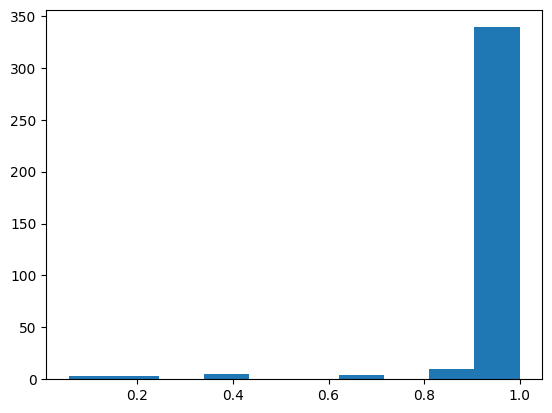

In [378]:
plt.hist(y_pred[solucion])

## Comparando y guardando las mejores instancias 

In [3]:
PATH_INSTANCES = './BRKGA/instances/Erdos/train/'
import os

In [4]:
graphs_aco = [graph for graph in os.listdir(PATH_INSTANCES + "optimal_aco")]
graphs_brkga = [graph for graph in os.listdir(PATH_INSTANCES + "optimal_brkga")]

In [5]:
Aco_len = []
brkga_len = []

for aco in graphs_aco:
    with open(PATH_INSTANCES +"optimal_aco/"+ aco) as f:
        Aco_len.append(len(f.readlines()))

for brkga in graphs_brkga:
    with open(PATH_INSTANCES +"optimal_brkga/"+ brkga) as f:
        brkga_len.append(len(f.readlines()))


In [7]:
graphs_aco

['ER_1000_10_0.dimacs',
 'ER_1000_10_1.dimacs',
 'ER_1000_10_2.dimacs',
 'ER_1000_10_3.dimacs',
 'ER_1000_15_0.dimacs',
 'ER_1000_15_1.dimacs',
 'ER_1000_15_2.dimacs',
 'ER_1000_15_3.dimacs',
 'ER_1000_20_0.dimacs',
 'ER_1000_20_1.dimacs',
 'ER_1000_20_2.dimacs',
 'ER_1000_20_3.dimacs',
 'ER_2000_10_0.dimacs',
 'ER_2000_10_1.dimacs',
 'ER_2000_10_2.dimacs',
 'ER_2000_10_3.dimacs',
 'ER_2000_15_0.dimacs',
 'ER_2000_15_1.dimacs',
 'ER_2000_15_2.dimacs',
 'ER_2000_15_3.dimacs',
 'ER_2000_20_0.dimacs',
 'ER_2000_20_1.dimacs',
 'ER_2000_20_2.dimacs',
 'ER_2000_20_3.dimacs',
 'ER_5000_10_0.dimacs',
 'ER_5000_10_1.dimacs',
 'ER_5000_10_2.dimacs',
 'ER_5000_10_3.dimacs',
 'ER_5000_15_0.dimacs',
 'ER_5000_15_1.dimacs',
 'ER_5000_15_2.dimacs',
 'ER_5000_15_3.dimacs',
 'ER_5000_20_0.dimacs',
 'ER_5000_20_1.dimacs',
 'ER_5000_20_2.dimacs',
 'ER_5000_20_3.dimacs']

In [8]:
aco_best = 0
for br, aco, graph in zip(brkga_len, Aco_len, graphs_aco):
    print(f"Graph:{graph}")
    if aco <= br:
        #shutil.copy2(PATH_INSTANCES + "optimal_aco/" + graph, PATH_INSTANCES + "optimal/" + graph)
        print(f"Aco best solution: {aco}")
        aco_best += 1
    else:
        #shutil.copy2(PATH_INSTANCES + "optimal_brkga/" + graph, PATH_INSTANCES + "optimal/" + graph)
        print(f"brkga best solution: {br}")
        
    print(aco, "vs", br)

Graph:ER_1000_10_0.dimacs
Aco best solution: 141
141 vs 142
Graph:ER_1000_10_1.dimacs
brkga best solution: 143
148 vs 143
Graph:ER_1000_10_2.dimacs
brkga best solution: 146
150 vs 146
Graph:ER_1000_10_3.dimacs
Aco best solution: 148
148 vs 149
Graph:ER_1000_15_0.dimacs
Aco best solution: 185
185 vs 186
Graph:ER_1000_15_1.dimacs
Aco best solution: 176
176 vs 177
Graph:ER_1000_15_2.dimacs
brkga best solution: 178
181 vs 178
Graph:ER_1000_15_3.dimacs
brkga best solution: 185
189 vs 185
Graph:ER_1000_20_0.dimacs
brkga best solution: 199
202 vs 199
Graph:ER_1000_20_1.dimacs
brkga best solution: 205
213 vs 205
Graph:ER_1000_20_2.dimacs
brkga best solution: 203
209 vs 203
Graph:ER_1000_20_3.dimacs
brkga best solution: 212
216 vs 212
Graph:ER_2000_10_0.dimacs
brkga best solution: 301
305 vs 301
Graph:ER_2000_10_1.dimacs
Aco best solution: 312
312 vs 313
Graph:ER_2000_10_2.dimacs
Aco best solution: 306
306 vs 310
Graph:ER_2000_10_3.dimacs
brkga best solution: 304
305 vs 304
Graph:ER_2000_15_0.d

In [68]:
print(f"Aco fue mejor en el {(aco_best / len(graphs_aco))*100:.2f}% de las veces")

Aco fue mejor en el 95.00% de las veces


## Generado scalefree ahora yo

In [23]:
nx.barabasi_albert_graph(n = 1_000, m = 23, seed=10374196, initial_graph = None)

In [3]:
import networkx as nx
import igraph

In [70]:
VectorList

['0 204',
 '0 501',
 '0 595',
 '0 648',
 '0 694',
 '0 724',
 '0 922',
 '1 131',
 '1 436',
 '1 523',
 '1 617',
 '1 695',
 '1 812',
 '1 975',
 '2 236',
 '2 429',
 '2 559',
 '2 661',
 '2 847',
 '2 955',
 '2 980',
 '2 997',
 '3 95',
 '3 113',
 '3 428',
 '3 475',
 '3 753',
 '3 804',
 '3 859',
 '3 948',
 '3 959',
 '3 970',
 '4 45',
 '4 323',
 '4 326',
 '4 583',
 '4 654',
 '4 664',
 '4 696',
 '4 898',
 '4 941',
 '4 944',
 '4 980',
 '5 315',
 '5 409',
 '5 467',
 '5 742',
 '5 886',
 '5 917',
 '6 341',
 '6 610',
 '6 639',
 '6 759',
 '6 845',
 '6 920',
 '6 942',
 '6 959',
 '7 305',
 '7 538',
 '7 547',
 '7 907',
 '8 121',
 '8 221',
 '8 553',
 '8 711',
 '8 768',
 '8 774',
 '8 790',
 '8 813',
 '8 912',
 '8 963',
 '9 273',
 '9 364',
 '9 435',
 '9 568',
 '9 810',
 '9 811',
 '9 983',
 '10 19',
 '10 98',
 '10 606',
 '10 871',
 '10 966',
 '10 990',
 '11 93',
 '11 272',
 '11 295',
 '11 380',
 '11 447',
 '11 519',
 '11 553',
 '11 569',
 '11 796',
 '11 821',
 '11 913',
 '11 916',
 '12 66',
 '12 651',
 '12 7

In [20]:
PATH = './BRKGA/instances/socialnetworks/txt/graph_karate.txt'



file1 = open(PATH, 'r')
Lines = file1.readlines()
VectorList = []
for line in Lines:
    VectorList.append(line.replace("\n",""))
    
file1.close()
G2 = nx.parse_edgelist(VectorList, nodetype=int)

H = nx.Graph()
H.add_nodes_from(sorted(G2.nodes(data=True)))
H.add_edges_from(G2.edges(data=True))

In [21]:
np.array(list(H))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

In [90]:
G.is_directed() == H.is_directed()

True

In [91]:
G.nodes() == H.nodes()

True

In [92]:
H.edges() == G.edges()

True

In [19]:
f = ["a", "b"]
f.sort(reverse = True)
f

['b', 'a']

In [68]:
list(nx.isolates(G2))

[]

In [30]:
H.number_of_nodes()

62

In [64]:
F = getFeatures(G)

In [28]:
F2 = getFeatures(H)

In [36]:
F2

(array([[1.90825962e-02, 1.69622067e-02, 6.00000000e+00, 3.46590909e-01,
         1.95140154e-02],
        [2.13324436e-01, 2.46577792e-02, 8.00000000e+00, 3.71951220e-01,
         1.99196248e-01],
        [9.07281243e-03, 1.33357337e-02, 4.00000000e+00, 2.82407407e-01,
         1.00933515e-02],
        [2.37379651e-03, 9.62733496e-03, 3.00000000e+00, 3.08080808e-01,
         2.90528233e-03],
        [0.00000000e+00, 5.07910163e-03, 1.00000000e+00, 2.48979592e-01,
         0.00000000e+00],
        [4.38030018e-03, 1.44347482e-02, 4.00000000e+00, 2.38281250e-01,
         6.04223588e-03],
        [2.93725367e-02, 2.00631445e-02, 6.00000000e+00, 2.67543860e-01,
         2.78910926e-02],
        [1.18238619e-01, 1.56457197e-02, 5.00000000e+00, 3.65269461e-01,
         1.28002609e-01],
        [2.23657376e-02, 1.70952547e-02, 6.00000000e+00, 3.63095238e-01,
         2.28763336e-02],
        [2.08943804e-02, 2.34702155e-02, 7.00000000e+00, 2.52066116e-01,
         2.11086234e-02],
        [1

In [13]:
with open("./tes.npy", "wb") as f:
    np.save(f, F2[0], allow_pickle=True)

In [31]:
with open("./tes.npy", "rb") as f:
    d = np.load(f, allow_pickle=True)

In [35]:
d

array([array([1.90825962e-02, 2.13324436e-01, 9.07281243e-03, 2.37379651e-03,
              0.00000000e+00, 4.38030018e-03, 2.93725367e-02, 1.18238619e-01,
              2.23657376e-02, 2.08943804e-02, 1.60920209e-02, 0.00000000e+00,
              0.00000000e+00, 5.28463284e-02, 6.19720048e-02, 3.32922210e-02,
              3.30470986e-03, 1.14300163e-01, 1.48548997e-02, 1.33143942e-02,
              1.02645740e-01, 1.27006539e-02, 0.00000000e+00, 4.21827856e-02,
              7.38304349e-03, 1.64411484e-03, 4.36247723e-03, 2.92368605e-02,
              6.67569547e-02, 6.55292825e-02, 3.30504608e-02, 0.00000000e+00,
              3.27868852e-02, 5.71664401e-02, 3.26947597e-02, 0.00000000e+00,
              2.48237196e-01, 1.38569789e-01, 4.53522388e-02, 7.05167785e-02,
              1.43149518e-01, 2.32516007e-02, 2.91579519e-02, 6.28306044e-02,
              1.20378058e-02, 4.06704406e-02, 3.00846694e-03, 2.32014761e-02,
              0.00000000e+00, 9.28961749e-04, 3.34110349e-02, 8.

In [56]:
S = [[1,1,1,0], [0,0,1,1], [0,0,1,0], [0,1,1,1]]

In [59]:
np.linalg.inv(np.array(S))

array([[ 1.,  1., -1., -1.],
       [ 0., -1.,  0.,  1.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1., -1.,  0.]])

In [61]:
GP = np.array([[0,1,0,0,1,1,0], [1,0,0,0,1,1,1],[0,0,1,0,1,0,1], [0,0,0,1,0,1,1]])
GP

array([[0, 1, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1, 1, 1],
       [0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 1]])

In [63]:
np.dot(S, GP)%2

array([[1, 1, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 1, 0, 0, 1]], dtype=int32)

## Paralelizando

In [2]:
import multiprocessing as mp
import numpy as np
import networkx as nx
import os
import time
import argparse
import igraph

In [36]:
def getFeatures(G):
    
    BC = np.array(list(nx.betweenness_centrality(G, k = min(500, G.number_of_nodes()) ).values()))
    CC = np.array(list(nx.closeness_centrality(G).values()))
    #LC = np.array(list(nx.load_centrality(G).values()))
    DG = np.array(list(nx.degree(G))).T[1]
    PR = np.array(list(nx.pagerank(G).values()))

    EC = np.array(list(nx.eigenvector_centrality(G).values()))

    features = [BC, PR, DG, CC, EC]
    names = ["BC", "PageRank", "degree", "closeness_centrality", "E"]#, "LC"]
    return np.array(features).T, names

In [37]:
def writeFeatures(G, PATH, ins, elapsed):
    features, _ = getFeatures(G)
    subfij = '_feat'
    print(PATH + ins.split("/")[-1].replace(".txt","") + subfij + ".npy")
    with open(PATH + ins.split("/")[-1].replace(".txt","") + subfij + ".npy", "wb") as f:
        np.save(f, features, allow_pickle=True)


In [40]:

import numpy as np
import networkx as nx
import os
import time
import argparse


# In[231]:
PATH = "./BRKGA/instances/socialnetworks/txt/graph_ncstrlwg2.txt"

graphs = [PATH]
Graphs = []

for ins in graphs:
    file1 = open(ins, 'r')
    
    Lines = file1.readlines()
    VectorList = []
    for line in Lines:
        VectorList.append(line.replace("\n",""))

    file1.close()
    G2 = nx.parse_edgelist(VectorList, nodetype=int)

    H = nx.Graph()
    H.add_nodes_from(sorted(G2.nodes(data=True)))
    H.add_edges_from(G2.edges(data=True))
    """
    G = igraph.Graph.Read_Edgelist(PATH+ins, directed = False)
    G = G.to_networkx()
    """
    Graphs.append(H)

# In[229]:


In [33]:
c = 0
PATH_save = "./"
for G, ins in zip(Graphs, graphs):
    c+=1
    print(f"\n------------ {c} out of {len(Graphs)} ------------\n")
    print(f"\nNext graph: {ins}")
    
    s = time.time()
    features, _ = getFeatures(G)
    elapsed = time.time() - s
    print(f"\nTime elapsed: {elapsed:.3f}")
    
    writeFeatures(PATH_save, ins, features, elapsed)
    


------------ 1 out of 1 ------------


Next graph: ./BRKGA/instances/socialnetworks/txt/graph_ncstrlwg2.txt


KeyboardInterrupt: 

In [ ]:
c = 0
PATH_save = "./"
for G, ins in zip(Graphs, graphs):
    
    c+=1
    print(f"\n------------ {c} out of {len(Graphs)} ------------\n")
    print(f"\nNext graph: {ins}")
    p1 = mp.Process(target = writeFeatures, args = (G, PATH_save, ins, elapsed))
    s = time.time()
    p1.start()
    elapsed = time.time() - s
    print(f"\nTime elapsed: {elapsed:.3f}")
    
    


------------ 1 out of 1 ------------


Next graph: ./BRKGA/instances/socialnetworks/txt/graph_ncstrlwg2.txt


In [ ]:
import newtokx